<a href="https://colab.research.google.com/github/rtrochepy/machine_learning/blob/main/calculo_tir_tae_diario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fórmula TIR Diario**

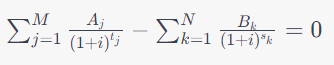

M = Número de veces que el cliente recibe fondos.

j = Número consecutivo que identifica cada ocasión en la que el cliente efectivamente recibe fondos.

Aj = Monto de la j-ésima ocasión en la que el cliente efectivamente recibe fondos.

tj = Intervalo de tiempo, expresado en días, que transcurre entre la fecha en que surte efecto el contrato y la fecha de la j-ésima ocasión en la que el
cliente efectivamente recibe fondos.

N = Número total de pagos.

k = Número consecutivo que identifica cada pago.

Bk = Monto del k-ésimo pago.

sk = Intervalo de tiempo, expresado en días, que transcurre entre la fecha en que surte efecto el contrato y la fecha del k-ésimo pago.

**Fórmula TAE**

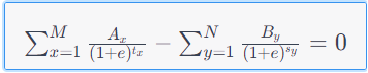

M = Número de veces que el cliente recibe fondos.

x = Número consecutivo que identifica cada ocasión en la que el cliente efectivamente recibe fondos.

Ax = Monto de la x-ésima ocasión en la que el cliente efectivamente recibe fondos.

tx = Intervalo de tiempo, expresado en años y fracciones de año, que transcurre entre la fecha en que surte efecto el contrato y la fecha de la x-ésima ocasión la que el cliente efectivamente recibe fondos.

N = Número total de pagos.

y = Número consecutivo que identifica cada pago.

By = Monto del y-ésimo pago.

sy = Intervalo de tiempo, expresado en años y fracciones de año, que transcurre entre la fecha en que surte efecto el contrato y la fecha del y-ésimo pago.

**Calculo del TAE a partir del TIR Diario**

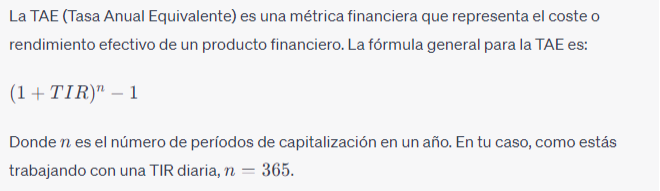

In [1]:
def calculate_sum(i, values, periods):
    return sum(val / (1 + i)**period for val, period in zip(values, periods))

In [2]:
def tir_diaria(flujos_iniciales, periodos_iniciales, flujos_finales, periodos_finales, tol=1e-6, max_iter=1000):
    lower = 0.0
    upper = 1.0

    for _ in range(max_iter):
        middle = (upper + lower) / 2
        sum_iniciales = calculate_sum(middle, flujos_iniciales, periodos_iniciales)
        sum_finales = calculate_sum(middle, flujos_finales, periodos_finales)
        diff = sum_iniciales - sum_finales

        if abs(diff) < tol or upper - lower < tol:
            return middle

        if diff < 0:
            lower = middle
        else:
            upper = middle

    raise ValueError("No se pudo encontrar una solución en las iteraciones dadas")

In [3]:
# Ejemplo de uso:

# Aquí, A, t, B y s son listas que representan las series de valores Aj, tj, Bk y sk respectivamente
A = [166750000]
t = [0]
B = [2094646, 2119693, 2144797, 2133315, 14129948, 2151237, 2144617, 2156388, 2146245, 2150638, 14140658, 2167551, 2158698, 2156369, 2166809, 2161394, 14162299, 2175182, 2167876, 2182567, 2180846, 2179182, 14174942, 2192367, 2188929, 2190066, 2193403, 2188082, 14199864, 2203918, 2203441, 2211536, 2207766, 2207446, 14213499, 2222103, 2221097, 2224835, 2226227, 2226581, 14229037, 2237363, 2241443, 2243478, 2243398, 2244993, 14247005, 2257684]
s = [40, 74, 102, 133, 165, 194, 225, 253, 284, 314, 347, 375, 406, 438, 467, 498, 529, 559, 592, 620, 649, 679, 711, 740, 771, 802, 832, 865, 893, 924, 956, 984, 1015, 1047, 1076, 1106, 1138, 1168, 1198, 1229, 1259, 1292, 1321, 1349, 1380, 1411, 1441, 1471]


In [4]:
i = tir_diaria(A, t, B, s)
TIR = i * 100
TAN = TIR * 365
TAE = ((1 + i)**365 - 1) * 100

print(f"TIR diaria: {TIR:.12f}%")
print(f"TAN: {TAN:.12f}%")
print(f"TAE: {TAE:.12f}%")

TIR diaria: 0.024557113647%
TAN: 8.963346481323%
TAE: 9.376126812111%
